In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, 
    f1_score, roc_curve, auc, classification_report
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

In [3]:
# Drop the ID column
data.drop(columns=['ID'], inplace=True)

In [4]:
# Encode the Diagnosis column
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

In [5]:
# EDA: Check for missing values and class distribution
print("Missing values:", data.isnull().sum().sum())
print("Class distribution:\n", data['Diagnosis'].value_counts())

Missing values: 0
Class distribution:
 Diagnosis
0    357
1    212
Name: count, dtype: int64


In [6]:
# EDA: Statistical summary
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
         Diagnosis   Feature_1   Feature_2   Feature_3    Feature_4  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127292   19.289649   91.969033   654.889104   
std      0.483918    3.524049    4.301036   24.298981   351.914129   
min      0.000000    6.981000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000

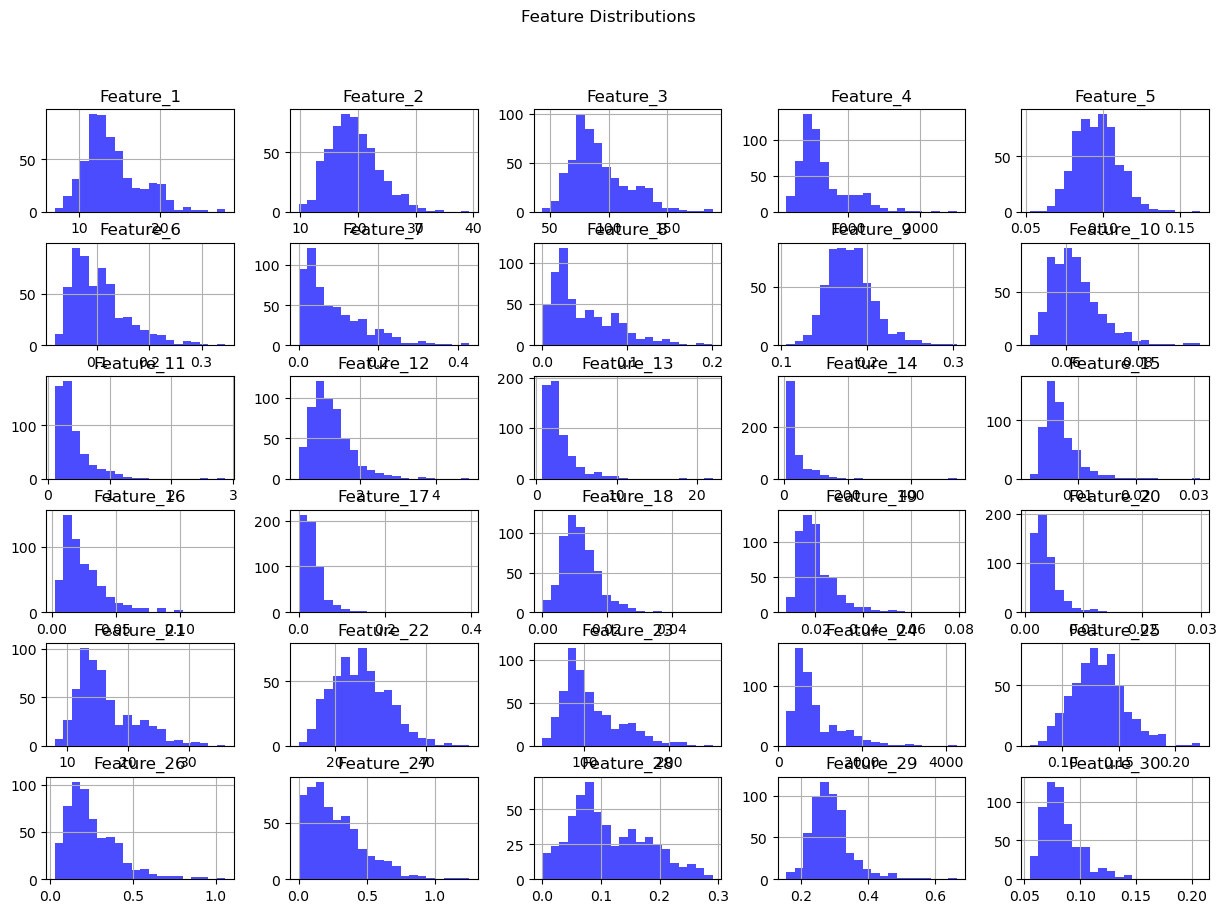

In [7]:
# EDA: Distribution of each feature
data.iloc[:, 1:].hist(figsize=(15, 10), bins=20, color='blue', alpha=0.7)
plt.suptitle('Feature Distributions')
plt.show()

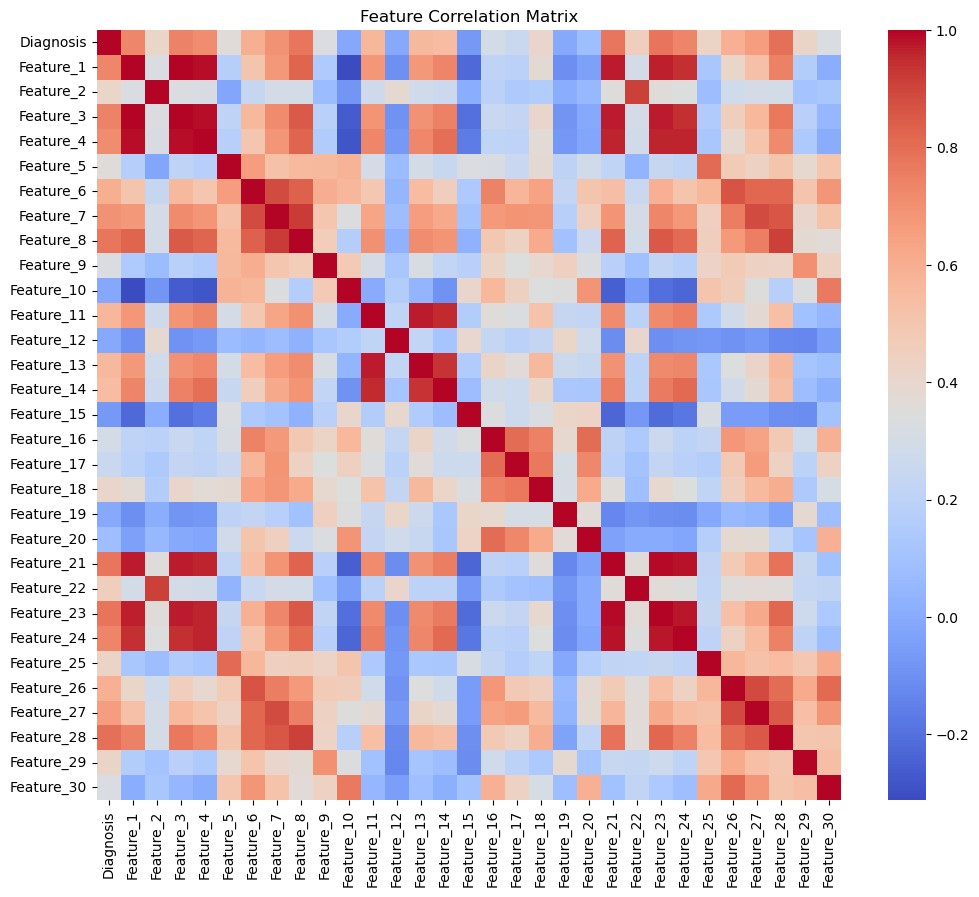

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
# Split data into features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [10]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}


In [21]:
# Initialize AdaBoost with GridSearchCV
adaboost = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [22]:
# Best parameters and accuracy
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.9737147215865752


In [23]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [24]:

# Print classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.97      0.99        71

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
 [[72  0]
 [ 2 69]]
Accuracy: 0.986013986013986
Precision: 1.0
Recall: 0.971830985915493
F1 Score: 0.9857142857142858


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np

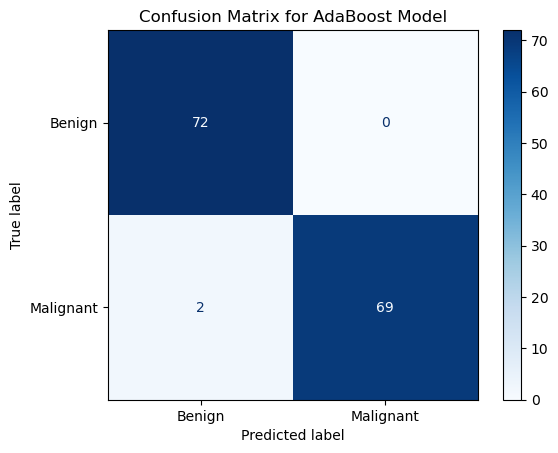

In [29]:
# Confusion Matrix
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for AdaBoost Model")
plt.show()

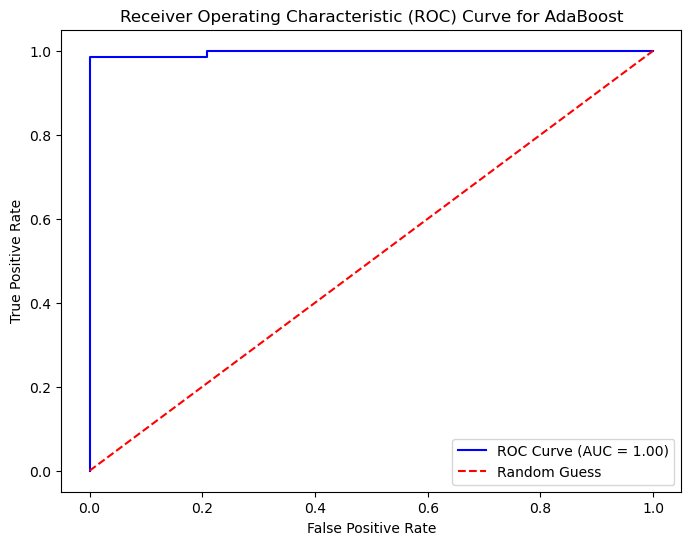

In [30]:
# ROC Curve and AUC for AdaBoost
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

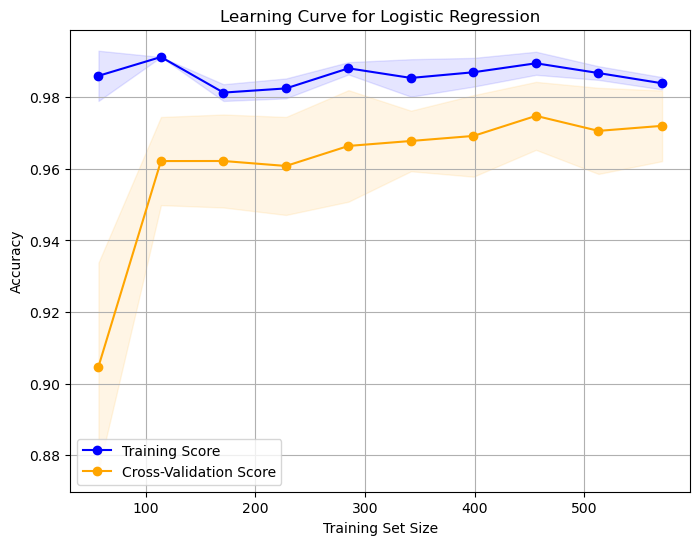

In [31]:
# Learning Curve for Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=500)
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()

In [33]:
# Save model and results for future reference
import joblib

In [34]:
# Save the best model
model_filename = "best_adaboost_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to best_adaboost_model.pkl


In [35]:
# Save GridSearchCV results
results_filename = "gridsearch_results.csv"
pd.DataFrame(grid_search.cv_results_).to_csv(results_filename, index=False)
print(f"Grid search results saved to {results_filename}")

Grid search results saved to gridsearch_results.csv


In [36]:
# Save final classification report as a text file
classification_report_filename = "classification_report.txt"
with open(classification_report_filename, 'w') as file:
    file.write("Classification Report:\n")
    file.write(classification_report(y_test, y_pred))
print(f"Classification report saved to {classification_report_filename}")

Classification report saved to classification_report.txt
